## 最急降下法

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

### 最急降下法とは
関数の勾配が最も急な方向に探索の方向を取りながら最小点にたどり着く方法。

### 2次2変数の最小値探索問題（凸2次計画問題）
関数 $f(x,y)=(x-3)^2+(2y-1)^2$の最小点を求めよ。
ただし、移動距離$\alpha$は計算を簡単にするため0.1に固定する。収束条件は1.0e-5とする。

まずは、$x,y$のそれぞれについて微分を行う。これを偏微分と呼ぶ。
$$\frac{\partial f}{\partial x} = 2x -6$$
  
$$\frac{\partial f}{\partial y} = 8y -4$$
微分の結果の関数は傾きを表す。進むべき方向は値が小さくなる方向であるため、マイナスをつける。
$$- \nabla f(x,y)=(-(2x-6),-(8y-4)) = (-2x+6,-8y+4)$$
これを勾配ベクトルと呼ぶ。  
例えば、$(x,y)=(1,1)$での勾配ベクトルは、
$$- \nabla f(1,1)=(-2 \times 1 + 6,-8 \times1+4)=(4,-4)$$
となるため、$(x,y)=(1,1)$上の球は右下45°の方向に転がっていくことになる。

### グラフを描画

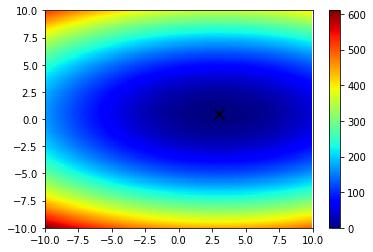

In [2]:
axis_x = np.arange(-10,10,0.1)
axis_y = np.arange(-10,10,0.1)
mx, my = meshgrid(axis_x, axis_y) 

#目的関数の値をつくる
mz = np.ones([200,200])
for i,y in enumerate(axis_y):
    z = [] 
    for x in axis_x:
        z.append((x-3)**2 + (2*y-1)**2) #目的関数
    mz[i] = z
    
#目的関数
plt.pcolor(mx,my,mz,cmap="jet")
plt.colorbar()

#目的関数の最小値
plt.scatter(x=3,y=0.5,marker="x",s=100,c="k")

#表示範囲
plt.xlim([-10,10])
plt.ylim([-10,10])

#描画
plt.show()

In [3]:
#条件設定
x = -9 #初期値
y = -9 #初期値
alpha = 0.1 #学習率
norm = 1
i = 0 
maxIter = 1000

#結果を格納するdataframe
df_re = pd.DataFrame()
df_re.loc[i,"x"] = x
df_re.loc[i,"y"] = y
df_re.loc[i,"norm"] = norm
i += 1

#計算
while norm > 1.0e-5:
    dx = -2 * x + 6
    dy = -8 * y + 4
    x += dx * alpha 
    y += dy * alpha
    norm = np.linalg.norm([dx,dy])
    df_re.loc[i,"x"] = x
    df_re.loc[i,"y"] = y
    df_re.loc[i,"norm"] = norm
    i += 1
    
    if i > maxIter:
        break
        
print(i,round(x,3),round(y,3),norm)

68 3.0 0.5 9.641628265555369e-06


### 結果のプロット

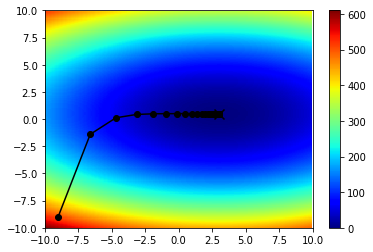

In [4]:
axis_x = np.arange(-10,10,0.1)
axis_y = np.arange(-10,10,0.1)
mx, my = meshgrid(axis_x, axis_y) 

#目的関数の値をつくる。
mz = np.ones([200,200])
for i,y in enumerate(axis_y):
    z = [] 
    for x in axis_x:
        z.append((x-3)**2 + (2*y-1)**2) #目的関数
    mz[i] = z
    
#目的関数
plt.pcolor(mx,my,mz,cmap="jet")
plt.colorbar()

#目的関数の最小値
plt.scatter(x=3,y=0.5,marker="x",s=100,c="black")

#表示範囲
plt.xlim([-10,10])
plt.ylim([-10,10])

#探索点
plt.plot(df_re["x"], df_re["y"], marker="o", c="k")

#描画
plt.show()

### [演習]
- 初期値を(x,y)=(9,9)に変更すると結果はどうかわるでしょうか？
- 学習率$\alpha$を0.2に変更すると結果はどうかわるでしょうか？
- 学習率$\alpha$を0.3に変更すると結果はどうかわるでしょうか？